# Introduction 

Today we're going to introduce time series analysis, different diagnostics checks, logistic regression, and feature engineering.

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

Before we start in on the new material, though, I want to touch on a summary statistic we nearly forgot: **standard error**. From Wiki:

"The **standard error (SE)** of a statistic (usually an estimate of a parameter) is the standard deviation of its sampling distribution or an estimate of that standard deviation. If the parameter or the statistic is the mean, it is called the **STANDARD OF THE MEAN (SEM).**

The **sampling distribution of a population mean** is generated by **repeated sampling and recording of the means obtained**. This forms a distribution of **different means**, and this **distribution has its own mean and variance**. Mathematically, the **variance of the sampling distribution obtained is equal to the variance of the population divided by the sample size**. This is because as the sample size increases, **sample means cluster more closely around the population mean**.

Therefore, the relationship between the **standard error** and the **standard deviation** is such that, for a given sample size, the **standard error equals the standard deviation divided by the square root of the sample size**. In other words, the **standard error of the mean** is **a measure of the dispersion of sample means around the population mean**."


## Libraries Used

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from __future__ import print_function
from statsmodels.compat import urlopen
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import statsmodels.api as sm
import pandas as pd
pd.set_option("display.width", 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

## ANOVA Table

I also want to briefly go over the **ANOVA table** that you'll sometimes see, as it lends itself well to the concepts that we've covered and that we'll continue to cover down below. (*Stata* example) Maybe someone

In [3]:
try:
    salary_table = pd.read_csv('salary.table')
    
except:  # recent pandas can read URL without urlopen
    
    """REMINDER: If an error is encountered, a try block code execution is stopped and transferred
                 down to the except block. Thus, if an error occurs, we will make use of the objects
                 below.

                 In addition to using an except block after the try block, you can also use the
                 finally block. 

                 The code in the finally block will be executed regardless of whether an exception
                 occurs."""
    
    url = 'http://stats191.stanford.edu/data/salary.table'
    fh = urlopen(url)
    salary_table = pd.read_table(fh)
    salary_table.to_csv('salary.table')

E = salary_table.E
M = salary_table.M
X = salary_table.X
S = salary_table.S

from statsmodels.stats.api import anova_lm

formula = 'S ~ C(E) + C(M) + X' # This 'C' notation is specific to whatever they're doing here
lm = ols(formula, salary_table).fit()

table1 = anova_lm(lm)
print(table1)

            df        sum_sq       mean_sq           F        PR(>F)
C(E)       2.0  1.091346e+08  5.456732e+07   51.691845  6.193659e-12
C(M)       1.0  5.105843e+08  5.105843e+08  483.678556  2.594015e-24
X          1.0  3.380979e+08  3.380979e+08  320.281524  5.546313e-21
Residual  41.0  4.328072e+07  1.055627e+06         NaN           NaN


## Time Series as a Concept

### White noise and autocorrelation

* WHITE NOISE: a sequence, or (c_ i)^(inf)_ (i=1), of IID random variables from a certain distribution (usually normal) –– think the epsilon term in a regression equation.

    * Speaking of IID, let's talk about autocorrelation of the residuals. But before we speak of autocorrelation of the residuals, let's talk about correlation in general.
    
        * CORRELATION: "a mutual relationship or connection between two or more things," or, in stats language, "interdependence of variable quantities."
    
    * Now, as for **AUTOCORRELATION**. **AUTOCORRELATION** is the correlation between the elements of a series and others from the same series separated from them by a given interval. **AUTOCORRELATION** of the **RESIDUALS** can be viewed like this (see board). 
    
        * (Check out Ben Lambert's video on this: https://www.youtube.com/watch?v=jt5nl2VEpwg)
        
            * Ben mentions how **autocorrelation** can be caused by an **OMITTED VARIABLE** (this omitted variable may be an **INTERACTION TERM**, but more on that later) or a **functional misspecification** of our model. Think using **LINEAR REGRESSION** when **POLYNOMIAL REGRESSION** would work much better. (See board.) As for other reasons for **autocorrelation**, I'm sure that they're out there, but these are probably the most important.
    

### Now let's discuss the difference between a white noise process and a random walk:
    
* RANDOM WALK: A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of **RANDOM** steps on some mathematical space such as the integers. (See board)
    
* One depends on PAST VALUES (random walk), while the other does NOT (white noise), and is thus MEAN REVERTING. 

    * We want to revert our time series to a **STATIONARY** process (a **white noise process**, e.g., is STATIONARY), but more on that later.
    

### The AR(p) model and the Autocorrelation Function (ACF)

* AR(1) model: y_ t = B_ 0 + B_ 1 * (y_ (t-1)) + (epsilon)_ t

How do we determine 'p' (or the number of lags)? The **AUTOCORRELATION FUNCTION (ACF)**, of course! (See board.) The **ACF**, with its **confidence intervals**, tells us which lags matter and which don't.





## Diagnostics Checking

Ideally, we'd like to be able to answer the below:

### Variable, not residual, correlation and Multicollinearity

- Why should we care if variables are correlated? Is it always a bad thing? (***Note*** that we don't say that the variables are **auto**correlated because that would imply that they would be correlated with themselves.)

    - When the variance inflation factor is too high (see below)

- How do we detect/deal with multicollinearity?

    - One way to measure multicollinearity is the variance inflation factor (VIF). 
    
    - The **variance inflation factor (VIF)** is calculated using the R^2. It provides an index that measures how much the **variance** (the **square** of the estimate's **standard deviation**) of an estimated regression coefficient is enlarged due to collinearity. I.e., one Beta estimate will move with another Beta estimate if there exists a high degree of correlation between the two.
    
        - When calculating the **VIF** of a explanatory variable, we regress the model's other explanatory variables on that variable. The result gives us insight as to whether or not a linear combination of the other variables might ***explain*** the variable in question (and whether that variable is really all that necessary)
        
        - Again, **R-squared** is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable.

### Encoding Data/Creating Dummies

- How do we encode our data to make it usable in predictive algorithms?

    - Python's onehotencoder function and also Pandas' .get_dummies() method are both good at encoding our data.


### Stationarity and Autocorrelation of Residuals

- **Dickey-Fuller test**: tests for stationarity of our time series. (See board.)

- How can we test if our data experiences **autocorrelation** *and* **nonstationarity**?

    - Augmented Dickey-Fuller test    
    
- What about just **autocorrelation**?

    - **Durbin-Watson test for autocorrelation** is a statistic that indicates the likelihood that the deviation (error) values for the regression have a first-order autoregression component.  The regression models assume that the error deviations are uncorrelated.

### Checking for Model Fit

***Note***: if we chose to NOT include an intercept in our model, note that our R^2 need not lie within the [0, 1] interval. If we were forced to start at the **ORIGIN**, it could very well be that the **intercept** (or TSS) does a better job at explaining the variance in 'y' (our dependent variable) than, say, our regression model. (This ought to be noted because of what we saw last week: while excluding the intercept was of benefit there, that isn't always the case.)

**F-statistic**, or the **F-test**: In general, an **F-test** in regression compares the fits of different linear models. Unlike t-tests that can assess only one regression coefficient at a time, the F-test can assess multiple coefficients simultaneously.

**Adjusted R-squared**: The **adjusted R-squared** is a ***MODIFIED*** version of R-squared that has been adjusted for the number of predictors in the model. The **adjusted R-squared increases only if the new term improves the model more than would be expected by chance**. It **decreases when a predictor improves the model by less than expected by chance**.

## Paired Programming

Let's try and write functions for both the F-statistic and the Adjusted R-squared.

## Logistic Regression

In [52]:
### Logistic regression uses the SIGMOID function to transform our line of best 
### fit into a cts. function residing within [0, 1]. Typically it gives us the 
### PROBABILITY that someone will or will not do something (whatever y is). If,
### say, the prob. of somebody doing y is less than some arb. #, we can assume
### that they ARE NOT going to do y, whereas if it was greater than the arb. #,
### we could assume that they WILL do y. 

## Importing the Dataset ##
dataset = pd.read_csv('/Users/MattMecca/Documents/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values # Looking at Age and Estimated Salary as our
                                   # the ind. vars. in our X matrix
y = dataset.iloc[:, 4].values # y, our dep. var., is the Purchased var., which
                              # tell us whether or not the user bought the car
                              
                              


In [53]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [54]:
## Splitting the Dataset into the Training set and Test Set ##
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# We allocate 100 obs.s to the test set and 300 obs.s to the training set; the 
# random state parameter randomly selects which obs.s go where?




In [55]:
y_train = y_train.reshape(-1, 1)


In [62]:
?StandardScaler().fit_transform

In [56]:
## Feature Scaling ##
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
# We DO apply feature scaling here because we especially want ACCURATE predictions

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

In [57]:
y_train = y_train.astype(int)
y_train = np.stack(y_train.ravel())


In [58]:
## Fitting Logistic Regression to the Training Set - Step 2 ##
from sklearn.linear_model import LogisticRegression # import the class (blueprint)
classifier = LogisticRegression(random_state = 0) # The object (house) that we 
# create is the CLASSIFIER that we are going to FIT on our TRAINING SET
classifier.fit(X_train, y_train) # Again, we want to FIT it to our training sets
# X_train and y_train so that our CLASSIFIER learns the correlations b/w the two.
# By learning those correlations, it will be able to use what it learned to 
# predict new observations, or those observations in the TEST SET


## Predicting the Test Results - Step 3 ##
y_pred = classifier.predict(X_test) # y_pred the VECTOR of predictions, or the
# vector that gives the prediction of each of the test set's observations


In [59]:
## Making the Confusion Matrix ##

'''A confusion matrix is a table that is often used to describe the performance 
 of a classification model (or "classifier") on a set of test data for which 
 the true values are known. This is EXACTLY what Samhita used on our forex
 project '''

from sklearn.metrics import confusion_matrix # NOTE: a CLASS will contain Capital 
# letters when importing (e.g., LogisticRegression), while a FUNCTION will NOT 
# (e.g., confusion_matrix) 
cm = confusion_matrix(y_test, y_pred) # True numbers vs. PREDICTED numbers
cm # Shows the actual matrix, which says that we have 65 + 24 = 89 CORRECT 
   # predictions and 8 + 3 = 11 INCORRECT predictions


array([[65,  3],
       [ 8, 24]])

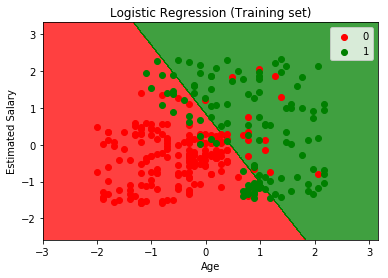

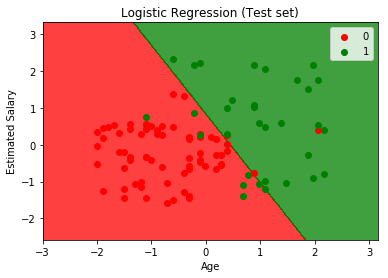

In [60]:
## Visualizing the Training Set Results - Step 5 ##
    
# Here we are going to clearly see the region where the user IS going to buy 
# the product, as well as the other region where the user IS NOT going to buy
# the product

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train # X_set and y_set replace X_train and y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
# It's "".min() - 1 and "".max + 1 b/c we don't want any obs. to get squeezed onto the axes                     
# We take every pixel here (with 0.01 resolution; e.g., if we chose 0.05 
# resolution we could actually SEE the pixel points and the area would NOT be 
# filled in) and we applied our classifier on it. You can think of it like each
# of the pixel points is a user of the social network with a salary and an age. 
# All the pixel points w/ a zero pred. is to the left and all the pixel points 
# w/ a one pred. is to the right                      
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
# This is where we apply the classifier on ALL of the pixel points, shading it
# either RED or GREEN. We then use the contourf function to make the CONTOUR
# (or the OUTLINE) between the red and green regions. Finally we the predict 
# function, which predicts whether the pixel point belongs to class 0 or class 1.
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# If the pixel point belongs to class 0, it will be colorized in red, and if the
# the pixel point belongs to class 1, it will be colorized in green
plt.xlim(X1.min(), X1.max()) # Plot X, or the age 
plt.ylim(X2.min(), X2.max()) # Plot y, or the estimated salary
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], # Here we are going
                # to plot all of the REAL data points
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Red and green points the obs. points of our training set. I.e., these are all
# the users of the social network that were selected to go to the training set;
# their age is shown via the x-axis, their est. salary via the y-axis. The red
# points are the training set obs.s for which the dep. var., or Purchased, is 
# equal to zero. The green points are the training set obs.s for which the dep. var., or Purchased, is 
# equal to one. Red = didn't buy the SUV; Green = did buy the SUV. Reason for 
# Age and Estimated Salary being b/w -2 and 2 is because we applied feature 
# scaling to the data set

# Seems that OLDER people with a HIGHER estimated salary tended to BUY the SUV.
# Note also that there are some young people, too, that bought the SUV; their 
# estimated salaries, though, were typically pretty high

# The GOAL of CLASSIFICATION is to classify the RIGHT users into the RIGHT 
# categories. We do this by plotting what we can call "predicition regions." I.e.,
# for each user in the red region, our logistic regression classifier predicts
# that the user does NOT buy the SUV, while for each user in the GREEN region, 
# our logistic regression classifier predicts that the user DOES buy the SUV


## Visualising the Test Set Results ##
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# The straight line in our graph is called the PREDICTION BOUNDARY. Its
# linearity is NOT random; it's straight because this particular logistic 
# classifier is a LINEAR classifier. If we were in three dimensions, then it 
# would be a straight plane separating two SPACES. This explains WHY we've
# misspecified some of the obs.s in our test set: our classifier is LINEAR 
# while our users show a NONLINEAR distribution. We cannot, as it stands, rotate
# our line any one way or another in order to improve the classification. All 
# in all, though, it does a halfway decent job of classifying


## Feature Engineering: Dummy Variables, Squared Variables, and Interaction Terms

# Ignore for now

### Decision Trees

We'll cover this in our next class.

We can try and come back to this topic in our final class.

### GARCH(1, 1) Model

In [ ]:
# Simulating a GARCH(1, 1) process

np.random.seed(2)

a0 = 0.2
a1 = 0.5
b1 = 0.3

n = 10000
w = np.random.normal(size=n)
eps = np.zeros_like(w)
sigsq = np.zeros_like(w)

for i in range(1, n):
    sigsq[i] = a0 + a1*(eps[i-1]**2) + b1*sigsq[i-1]
    eps[i] = w[i] * np.sqrt(sigsq[i])

_ = tsplot(eps, lags=30)

Notice that overall this process closely resembles white noise, however take a look when we view the squared eps series. 

There is clearly autocorrelation present and the significance of the lags in both the ACF and PACF indicate we need both AR and MA components for our model. Let's see if we can recover our process parameters using a GARCH(1, 1) model. Here we make use of the arch_model function from the ARCH package. 



In [ ]:
# Fit a GARCH(1, 1) model to our simulated EPS series
# We use the arch_model function from the ARCH package

am = arch_model(eps)
res = am.fit(update_freq=5)
p(res.summary())

Now let's run through an example using SPY returns. The process is as follows:

- Iterate through combinations of ARIMA(p, d, q) models to best fit our time series. 
- Pick the GARCH model orders according to the ARIMA model with lowest AIC.
- Fit the GARCH(p, q) model to our time series.
- Examine the model residuals and squared residuals for autocorrelation

Also note that I've chosen a specific time period to better highlight key points. However the results will be different depending on the time period under study. 

In [ ]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(5) # [0,1,2,3,4]
    d_rng = range(2) # [0,1]
    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    p('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

# Notice I've selected a specific time period to run this analysis
TS = lrets.SPY.ix['2012':'2015']
res_tup = _get_best_model(TS)

# aic: -5255.56673 | order: (3, 0, 2)

In [ ]:
# Now we can fit the arch model using the best fit arima model parameters

p_ = order[0]
o_ = order[1]
q_ = order[2]

# Using student T distribution usually provides better fit
am = arch_model(TS, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
p(res.summary())

Convergence warnings can occur when dealing with very small numbers. Multiplying the numbers by factors of 10 to scale the magnitude can help when necessary, however for this demonstration it isn't necessary. Below are the model residuals. 

Looks like white noise above. Now let's view the ACF and PACF of the squared residuals.

Looks like we have achieved a good model fit as there is no obvious autocorrelation in the squared residuals.